In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
def binary(x):
    return x.map({'yes':1,'no':0})

In [10]:
categorly = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea']

In [11]:
df[categorly] = df[categorly].apply(binary)

In [12]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


<Axes: xlabel='furnishingstatus'>

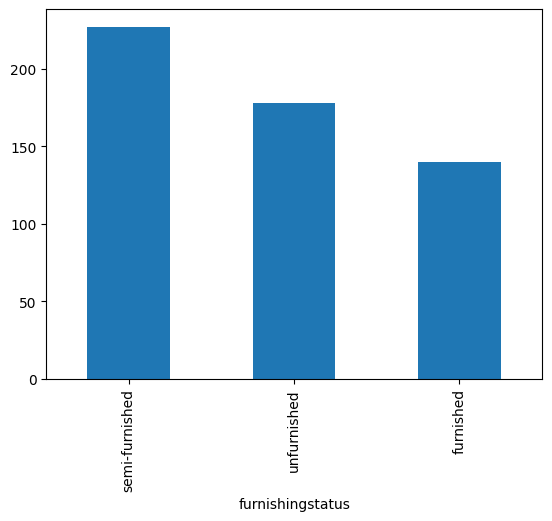

In [13]:
df['furnishingstatus'].value_counts().plot(kind='bar')

In [14]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


<Axes: ylabel='parking'>

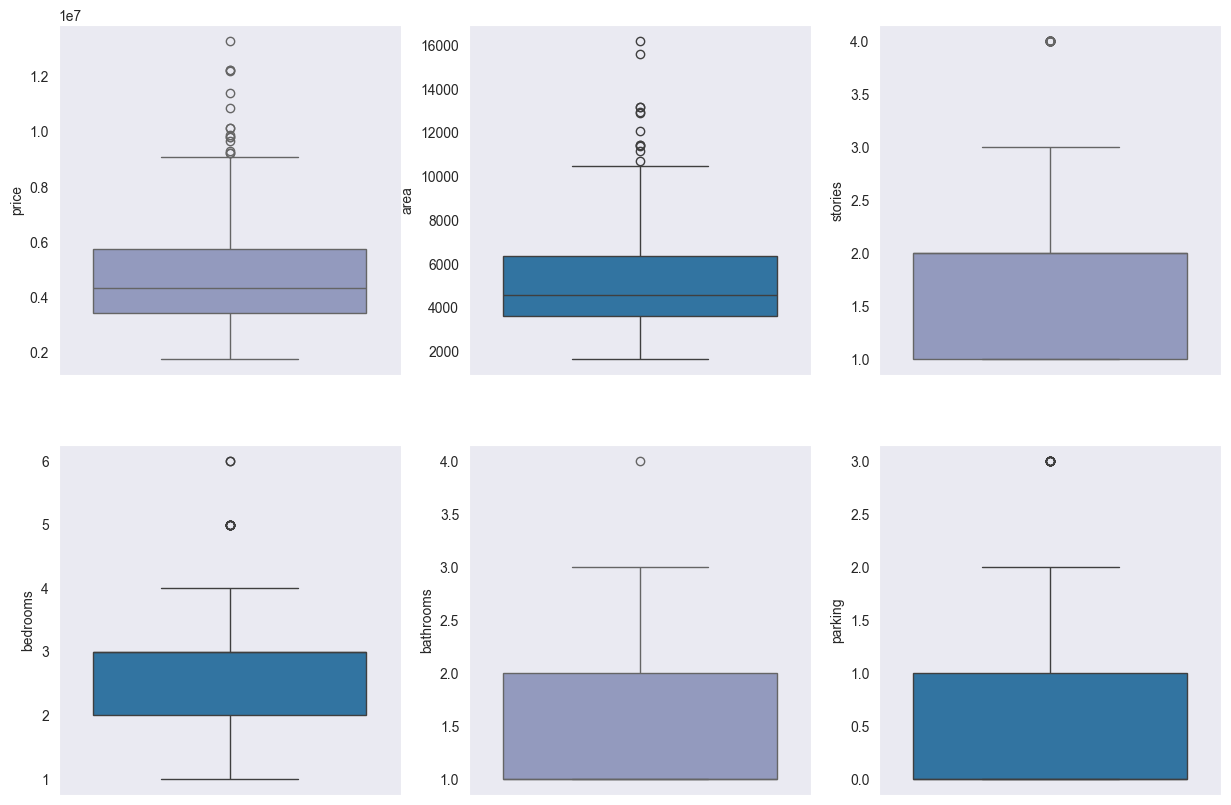

In [15]:
sns.set_style('dark')
fig,ax = plt.subplots(figsize=(15,10),ncols=3,nrows=2)
sns.boxplot(df['price'],ax=ax[0,0],palette='BuPu')
sns.boxplot(df['area'],ax=ax[0,1])
sns.boxplot(df['stories'],ax=ax[0,2],palette='BuPu')
sns.boxplot(df['bedrooms'],ax=ax[1,0])
sns.boxplot(df['bathrooms'],ax=ax[1,1],palette='BuPu')
sns.boxplot(df['parking'],ax=ax[1,2])

<Axes: >

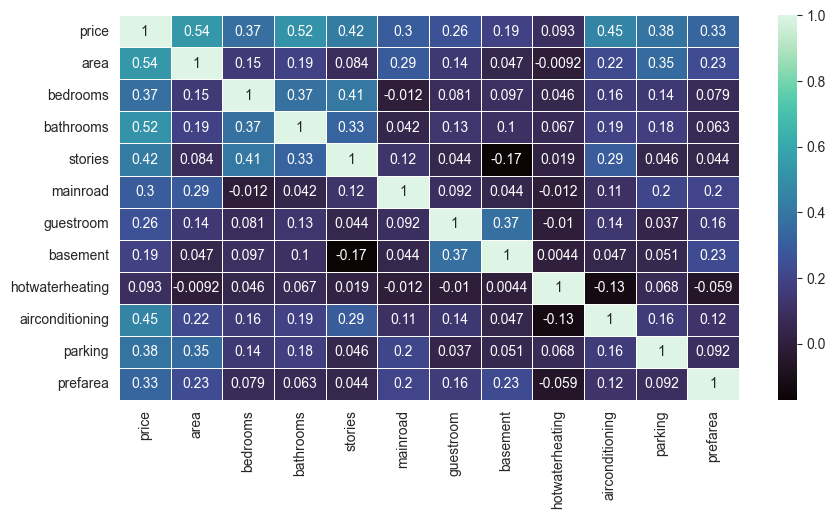

In [16]:
plt.figure(figsize=(10,5))
corr = df.select_dtypes('number')
corr = corr.corr()
sns.heatmap(corr,cmap='mako',annot=True,linewidths=0.5)

In [19]:
data = df.drop('furnishingstatus',axis=1)

**Predication With out furnishingstatus**

In [20]:
X = data.drop('price',axis=1)
y = data['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report

In [23]:
sc = StandardScaler()
sc.fit(X)
x = sc.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [25]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [26]:
pred = lg.predict(X_test)

In [27]:
print(r2_score(y_test,pred))

0.6363111296737218


In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [29]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [30]:
predict = knn.predict(X_test)

In [31]:
print(r2_score(y_test,predict))

0.5653200233826369


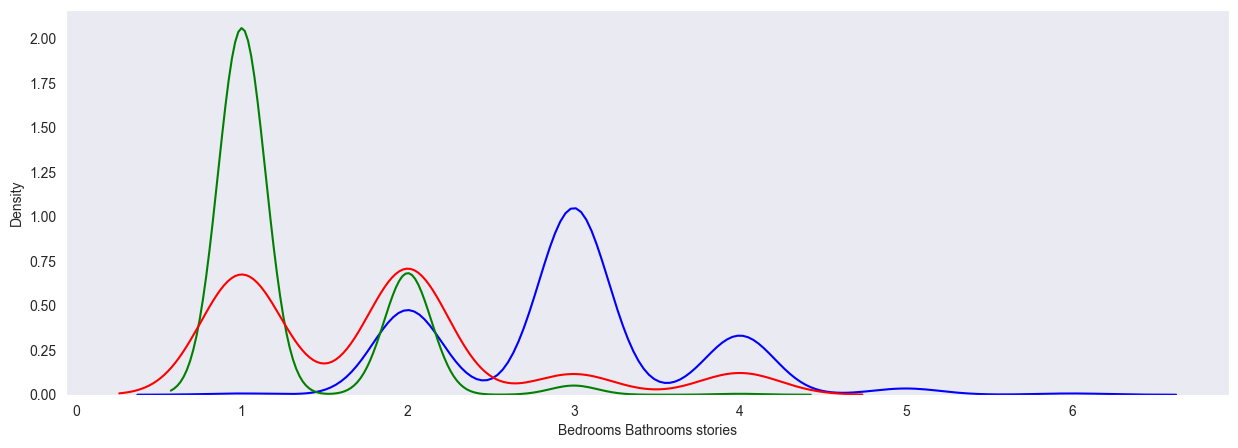

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(df['bedrooms'],hist=False,color='blue', label='Bedrooms')
sns.distplot(df['bathrooms'],hist=False,color='green', label='Bathrooms')
sns.distplot(df['stories'],hist=False,color='red', label='stories')
plt.xlabel('Bedrooms Bathrooms stories')
plt.show()

**Predication Using furnishingstatus**

In [33]:
df['furnishingstatus'].value_counts()
house = pd.get_dummies(df['furnishingstatus'])
house.head()


,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [34]:
df['semi-furnished'] = house['semi-furnished']
df['furnished'] = house['furnished']
df['unfurnished'] = house['unfurnished']

In [35]:
df = df.drop('furnishingstatus',axis=1)

In [36]:
def con(x):
    if x=='True':
        x=1
    else:
        x=0
    return x

In [37]:
df['semi-furnished'] = df['semi-furnished'].apply(con)
df['furnished'] = df['furnished'].apply(con)
df['unfurnished'] =  df['unfurnished'].apply(con)

In [38]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0,0


In [39]:
data = df[['price','stories','parking','basement']]

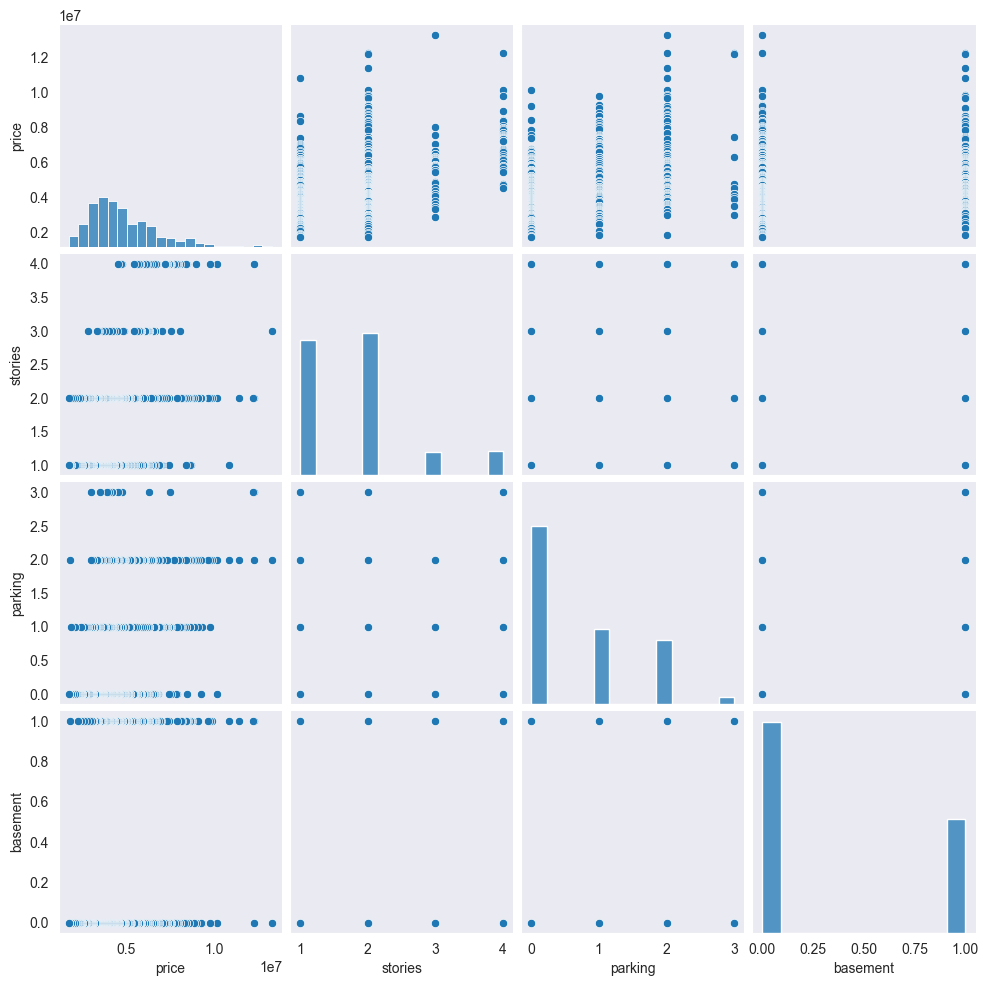

In [46]:
sns.pairplot(data)

In [41]:
x = df.drop(['price'],axis=1)
y=df['price']

In [42]:
sc = StandardScaler()
sc.fit(x)
x = sc.fit_transform(x)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [44]:
lg.fit(X_train,y_train)
pred = lg.predict(X_test)

In [45]:
print(r2_score(y_test,pred))

0.6363111296737218
